In [1]:
import os
from imp import reload
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

# Lical Library
import imgpatch
import vcompresslib

Using TensorFlow backend.


In [2]:
# The image is actually 240 x 416, 
#     so we will have 15 x 26 patches with frame shape of 15 x 26 instead of 26 x 15

# Data options
data_path = ['RaceHorses_416x240_30','BlowingBubbles_416x240_50' , 'BasketballDrill_832x480_50']

# Load data
image_data = imgpatch.load_data(data_path[0]) 
# train_image = imgpatch.load_data(data_path[0])
# test_image = imgpatch.load_data(data_path[1])
# Define training data, and test data
train_image, test_image = train_test_split(image_data, train_size = 0.75)

# Patch shape
patch_shape = (16, 16, 3)

# Convert image data to patches
train_data = imgpatch.get_patch(train_image, patch_shape)
test_data = imgpatch.get_patch(test_image, patch_shape)

(87750, 16, 16, 3)
(29250, 16, 16, 3)


In [3]:
# Train model
ratios = ['1/32','1/16','1/8','1/4','1/2']
decoders = []
for r in ratios:
    decoders.append(vcompresslib.model2(train_data, patch_shape, r))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          9472      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 32)          51232     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 2, 16)          528       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 2, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 2, 3)           219       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 2, 3)           84  

Epoch 1/1
87750/87750 [==============================] - 62s 708us/step - loss: 0.0040


In [4]:
# Feed test data into the feed model, and get decoded images 
decoded_images = []
for d in decoders:
    decoded_images.append(vcompresslib.get_decoded_image(d, test_data, \
                                               patch_shape, test_image.shape))

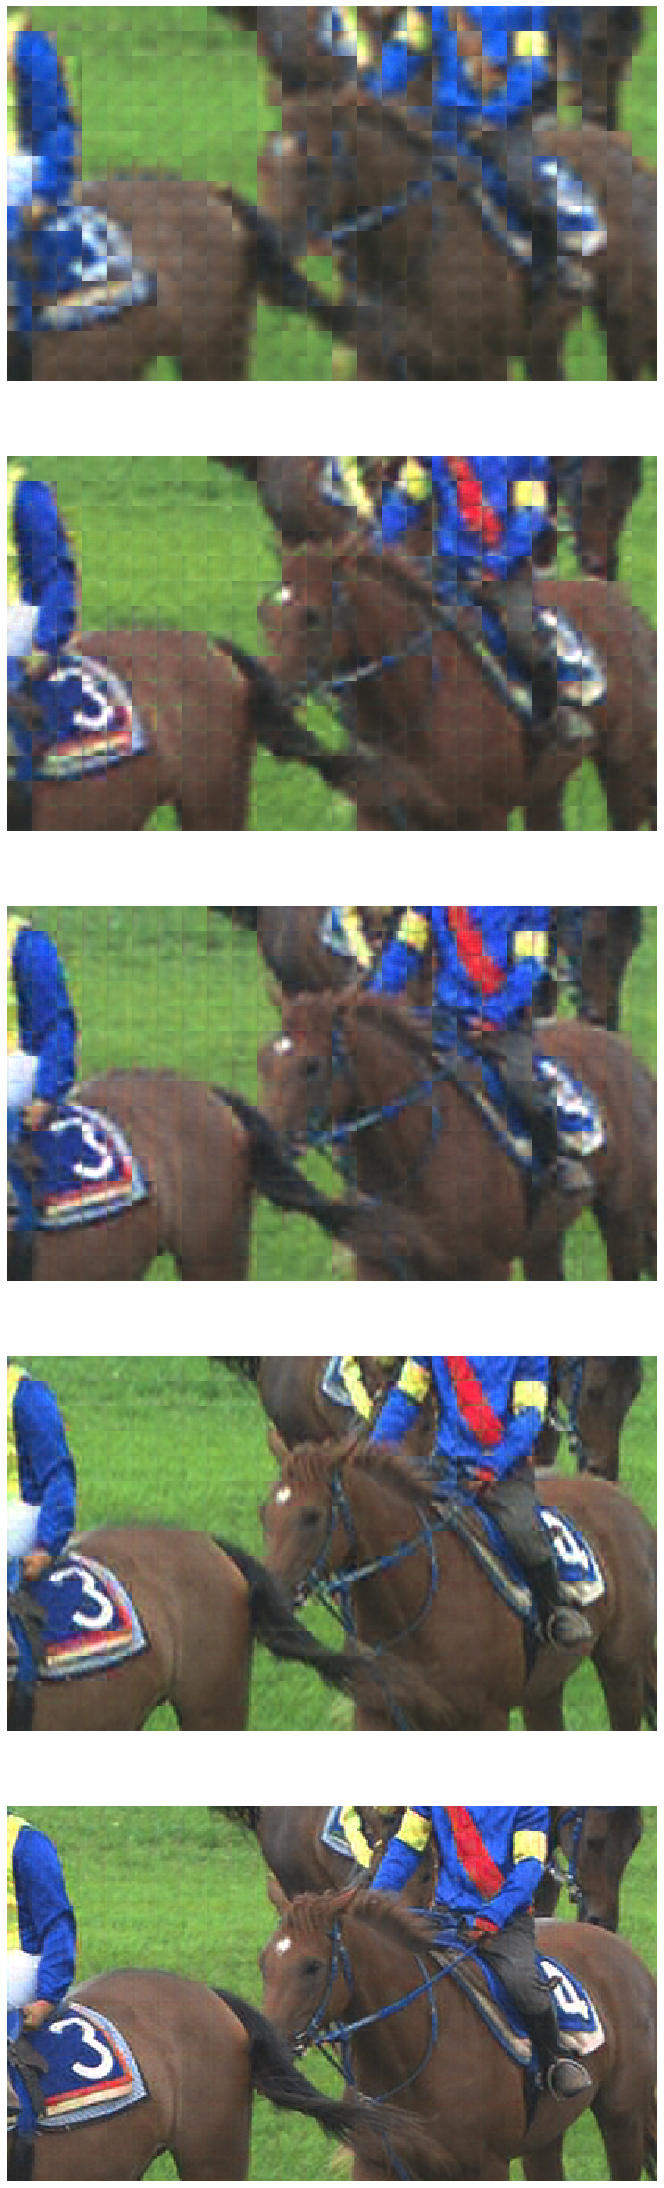

In [5]:
n_images = 5

_, axarr = plt.subplots(n_images,figsize=(40, 40), sharey=True)


for i in range(n_images):
        axarr[i].imshow(decoded_images[i][5])
        axarr[i].axis('off')

plt.show()

[21.265975761413575, 22.747776603698732, 23.702570215861, 26.20407730738322, 29.068934440612793]


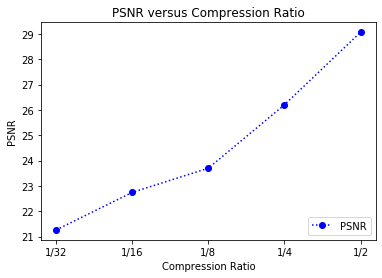

In [6]:
# Calculate average PSNR
PSNRs = []
for d_img in decoded_images:
    PSNRs.append(vcompresslib.get_psnr(test_image, d_img))

print(PSNRs)

# Giving a title to the graph 
plt.title('PSNR versus Compression Ratio') 

plt.plot(ratios, PSNRs, 'bo:', label = 'PSNR')
plt.xlabel('Compression Ratio')
plt.ylabel('PSNR')
plt.legend(loc = 4)

plt.show()